# HOMEWORK 12

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [34]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

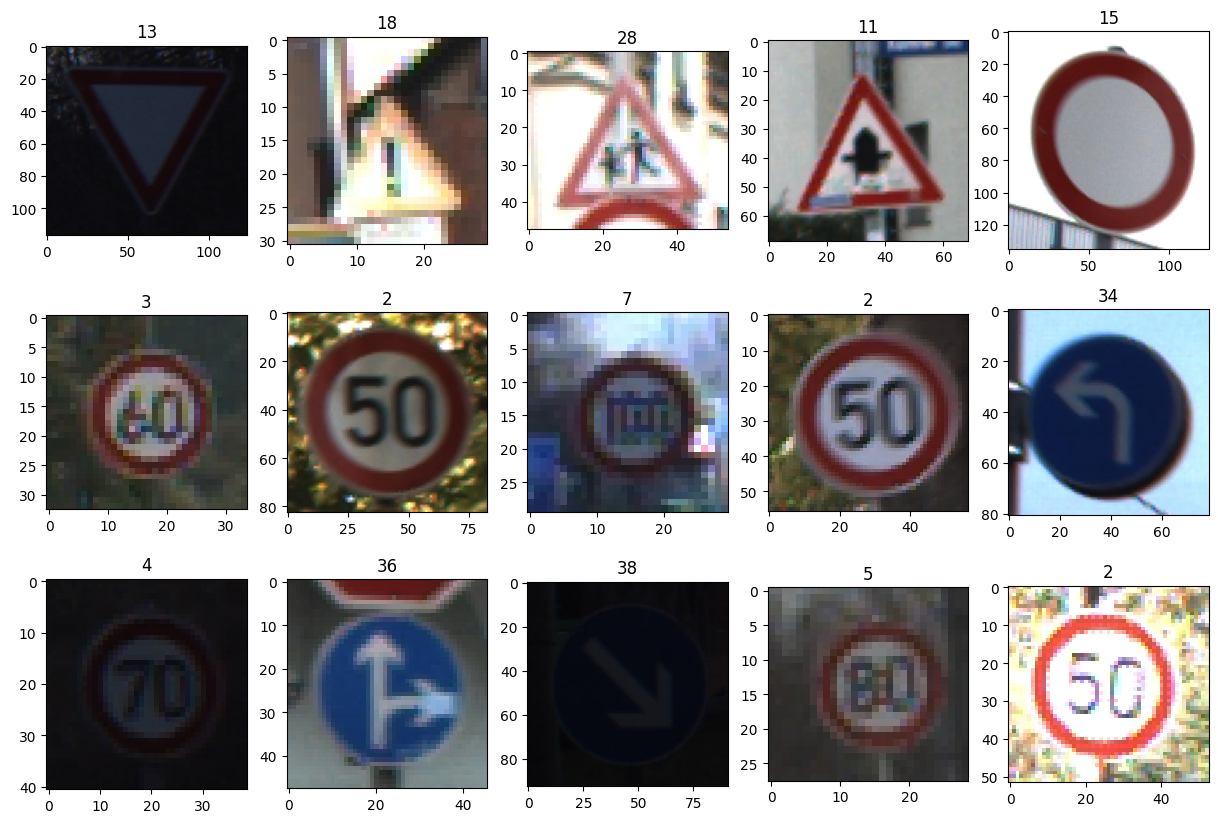

In [24]:
# Load the training labels
root = 'gtsrb' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = len(data)

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

In [63]:
# Extract class identifiers
# Hint: Check the csv 
ids = data['ClassId'].values

Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

(Text(0.5, 0, 'id'), Text(0, 0.5, 'counts'))

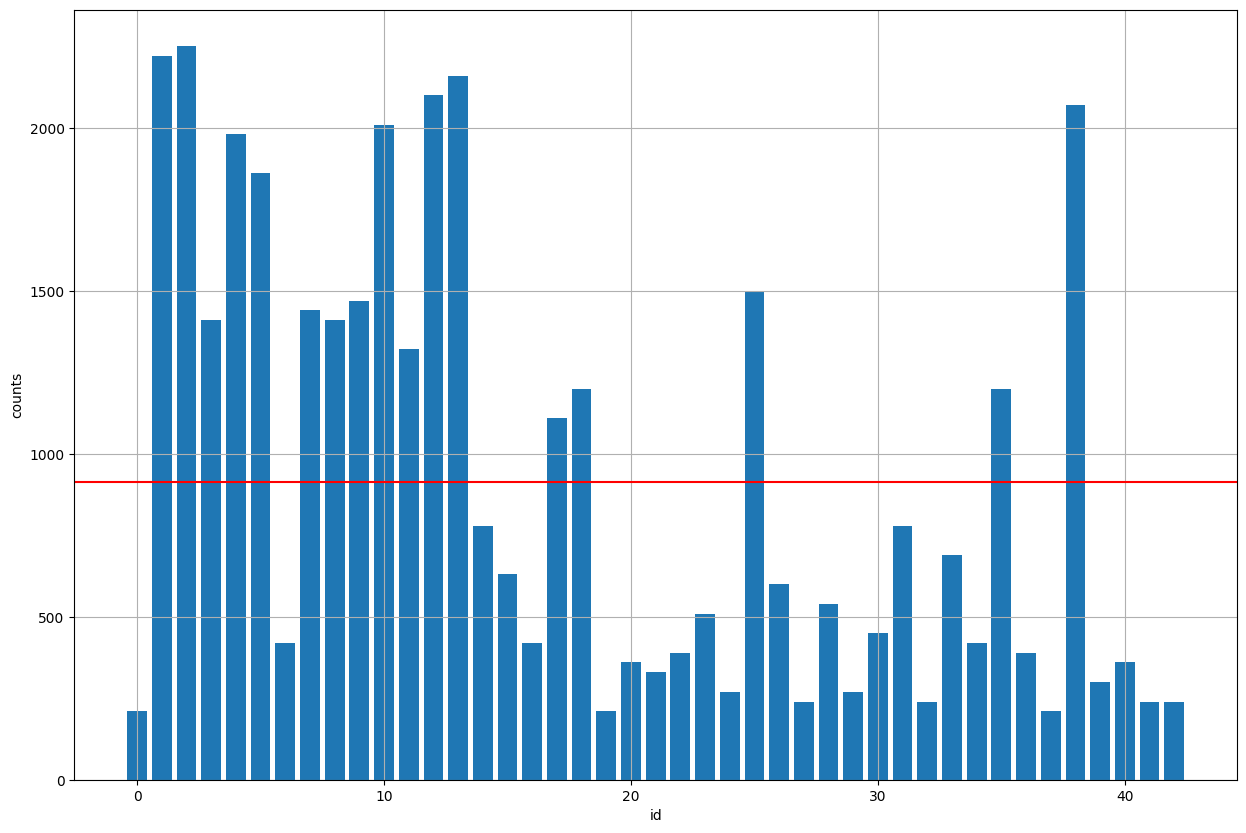

In [61]:
from collections import Counter
hist = Counter(ids)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.axhline(y=round(np.mean(list(hist.values()))), color='r', linestyle='-')
plt.xlabel('id'), plt.ylabel('counts')

In [16]:
print('Max number of samples per class:', max(hist.values()))
print('Min number of samples per class:', min(hist.values()))
print('Class with max number of samples:', max(hist, key=hist.get))
print('Class with min number of samples:', min(hist, key=hist.get))

Max number of samples per class: 2250
Min number of samples per class: 210
Class with max number of samples: 2
Class with min number of samples: 0


### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why?

нет, считаю что она не сбалансированая так как выше видно что у нас большой разброс количества данных по классам, например максимальное количество данных у второго класса (2250) а минимальное 210 у 0 класса. Это повлияяет на результат тренировки, скорее всего классы у которых было мало данных будут хуже опредиляться (ложно).

* Are there any classes that are (significantly) over-represented or under-represeneted?

да, конечно :) в первом вопросе я кажись ответил уже на этот вопрос) так же на графике выше добавил отображение среднеего значения данных, считаю что все что выше этого значение over-represented, все что ниже under-represeneted. Это "грубо", скорее всего необхожимо брать какой-то +- от среднего значения и уже отталкиваться от этого.

### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?

в данном наборе данных мы вилим большое расхождение в разрешении изображений (скорее всего сделано специально). если посмотрим ниже, то большой набор данных припадает на ~ 20x20px. как я понимаю это нам говорит что данные необхожимо обработать перед тем как отправлять на обучение в нейронку. Ниже привел график перемножив высоту на ширину всех изображений. 

Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?
по яркости тоже большой разброс. поделили все ихображения по ClassId, перебрал все изображения перевел в hsv забрал последний канал отвечающий за яркость, высчитал mean, потом mean по классу и вывел на график и видем что между классами изображений средняя яркость достаточно сильно отличается.

### Hint 1

In [41]:
resolutions = []
all_image_paths = [os.path.join(root, path) for path in data['Path']]
for image_path in all_image_paths:
    img =  cv2.imread(image_path)
    resolutions.append(img.shape[0] * img.shape[1])

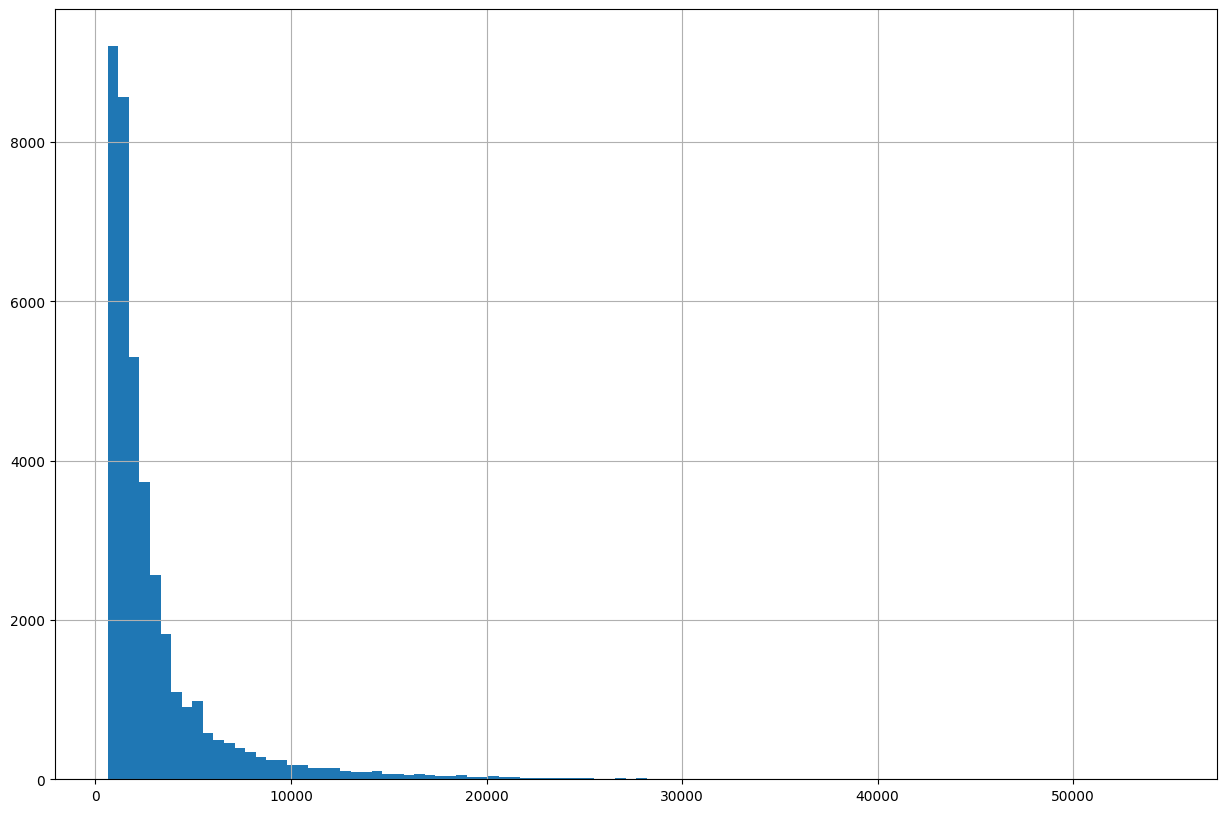

In [58]:
plt.hist(resolutions, bins=100)
plt.grid(True)


### Hint 2

<BarContainer object of 43 artists>

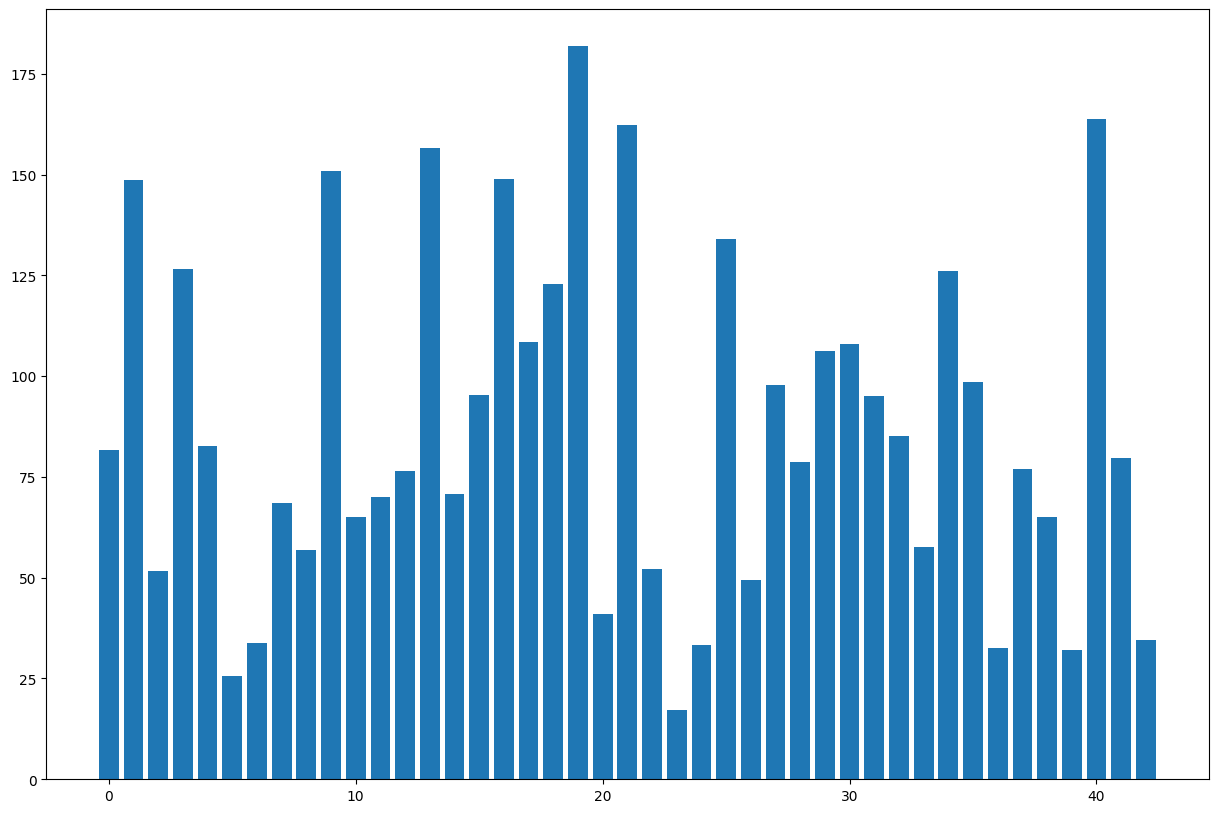

In [57]:
from collections import defaultdict
class_brightness = defaultdict(float)
for i in data.to_dict(orient='records'):
    img = cv2.imread(os.path.join(root, i['Path']))
    hsv_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    brightness = hsv_image[:, :, 2]
    class_brightness[i['ClassId']] = np.mean(brightness)
    

plt.bar(class_brightness.keys(), [np.mean(brightness) for brightness in class_brightness.values()])

